### Read Pandas dataframe

In [7]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [8]:
df = pd.read_csv('Student Performance new.csv')
df.head().style.background_gradient(axis=0)

,Unnamed: 0,race/ethnicity,parental level of education,lunch,test preparation course,math percentage,reading score percentage,writing score percentage,sex
0,0,group B,bachelor's degree,standard,none,0.720000,0.720000,0.740000,F
1,1,group C,some college,standard,completed,0.690000,0.900000,0.880000,F
2,2,group B,master's degree,standard,none,0.900000,0.950000,0.930000,F
3,3,group A,associate's degree,free/reduced,none,0.470000,0.570000,0.440000,M
4,4,group C,some college,standard,none,0.760000,0.780000,0.750000,M


In [9]:
df.columns

Index(['Unnamed: 0', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math percentage',
       'reading score percentage', 'writing score percentage', 'sex'],
      dtype='object')

In [10]:
df.isnull().sum()

Unnamed: 0                     0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math percentage                0
reading score percentage       0
writing score percentage       0
sex                            0
dtype: int64

### Addition of dummy columns

In [11]:
new_df = pd.get_dummies(df, columns = ['parental level of education', 'test preparation course'] ,drop_first= True,prefix = 'Dumy',prefix_sep ="*" )
new_df.head().style.background_gradient(axis=0)

,Unnamed: 0,race/ethnicity,lunch,math percentage,reading score percentage,writing score percentage,sex,Dumy*bachelor's degree,Dumy*high school,Dumy*master's degree,Dumy*some college,Dumy*some high school,Dumy*none
0,0,group B,standard,0.720000,0.720000,0.740000,F,1,0,0,0,0,1
1,1,group C,standard,0.690000,0.900000,0.880000,F,0,0,0,1,0,0
2,2,group B,standard,0.900000,0.950000,0.930000,F,0,0,1,0,0,1
3,3,group A,free/reduced,0.470000,0.570000,0.440000,M,0,0,0,0,0,1
4,4,group C,standard,0.760000,0.780000,0.750000,M,0,0,0,1,0,1


### Countplot

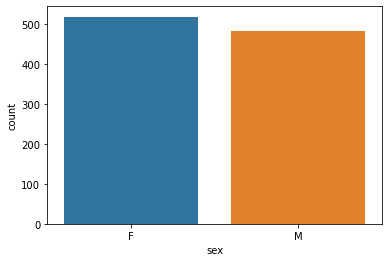

In [13]:
sns.countplot(data = new_df , x = 'sex')

### Scatterplots

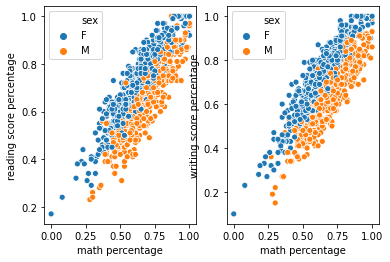

In [24]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False)
sns.scatterplot(data = new_df , x = 'math percentage',y= 'reading score percentage',hue = 'sex', ax=ax1)
sns.scatterplot(data = new_df , x = 'math percentage',y= 'writing score percentage',hue = 'sex', ax=ax2)

### Boxplots

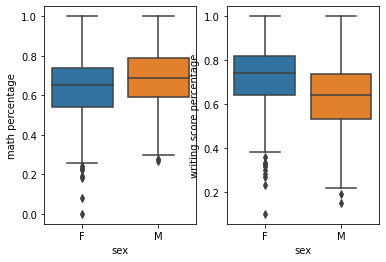

In [29]:
fig, (ax3, ax4) = plt.subplots(ncols=2, sharey=False)
sns.boxplot(data = new_df , x ='sex',y='math percentage', ax=ax3)
sns.boxplot(data = new_df , x ='sex',y='writing score percentage', ax = ax4)

### Processing of data 

In [36]:
X = new_df.drop(['sex', 'race/ethnicity', 'lunch'],axis = 1)
y = new_df['sex']

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, random_state=97)

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
scaler = StandardScaler()

In [41]:
scaler.fit(X_train)

StandardScaler()

In [42]:
scaled_x_train = scaler.transform(X_train)
scaled_x_test = scaler.transform(X_test)

### Performance of SVC classifier

In [43]:
from sklearn.svm import SVC

In [44]:
svc = SVC()
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.001,0.01,0.1,0.5,1]}
grid = GridSearchCV(svc,param_grid)
grid.fit(scaled_x_train,y_train)

GridSearchCV(estimator=SVC(), param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1]})

In [45]:
grid.best_params_

{'C': 1}

In [46]:
y_pred = grid.predict(X_test)

In [47]:
from sklearn.metrics import accuracy_score , plot_confusion_matrix , plot_roc_curve, classification_report

In [48]:
svc_accuracy = accuracy_score(y_test,y_pred)
svc_accuracy

0.5147058823529411

In [50]:
print(classification_report(y_test,y_pred, zero_division=0))

              precision    recall  f1-score   support

           F       0.51      1.00      0.68       175
           M       0.00      0.00      0.00       165

    accuracy                           0.51       340
   macro avg       0.26      0.50      0.34       340
weighted avg       0.26      0.51      0.35       340



### Performance of KNN classifier

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [56]:
test_error_rates = []
for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_x_train,y_train)
    y_prediction = knn_model.predict(X_test)
    test_error = 1- accuracy_score(y_test , y_prediction)
    test_error_rates.append(test_error)

Text(0.5, 0, 'K Neigbors')

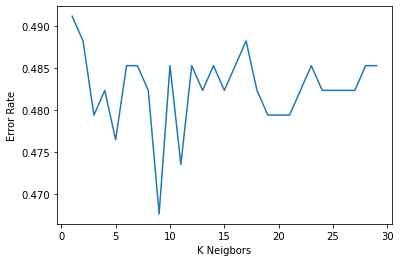

In [54]:
plt.plot(range(1,30),test_error_rates)
plt.ylabel('Error Rate')
plt.xlabel('K Neigbors')

In [57]:
model = KNeighborsClassifier(n_neighbors=9)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [58]:
y_predictions = model.predict(X_test)

In [60]:
print(classification_report(y_test,y_predictions))

              precision    recall  f1-score   support

           F       0.53      0.59      0.56       175
           M       0.51      0.45      0.48       165

    accuracy                           0.52       340
   macro avg       0.52      0.52      0.52       340
weighted avg       0.52      0.52      0.52       340



In [61]:
knn_model_accuracy = accuracy_score(y_test,y_predictions)
knn_model_accuracy

0.5205882352941177

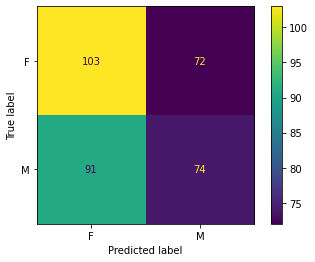

In [62]:
plot_confusion_matrix(model,X_test,y_test)

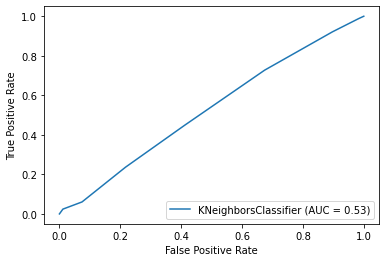

In [63]:
plot_roc_curve(model,X_test,y_test)

### Performance of Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
log_model = LogisticRegression()

In [66]:
log_model.fit(scaled_x_train,y_train)

LogisticRegression()

In [67]:
predections = log_model.predict(scaled_x_test)

In [68]:
logistic_regression_model_accuracy = accuracy_score(y_test,predections)
logistic_regression_model_accuracy

0.9058823529411765

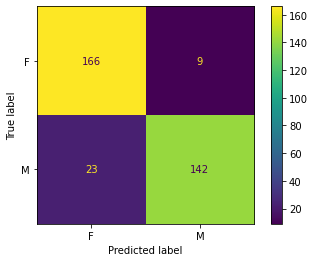

In [69]:
plot_confusion_matrix(log_model,scaled_x_test,y_test)

In [70]:
print(classification_report(y_test,predections))

              precision    recall  f1-score   support

           F       0.88      0.95      0.91       175
           M       0.94      0.86      0.90       165

    accuracy                           0.91       340
   macro avg       0.91      0.90      0.91       340
weighted avg       0.91      0.91      0.91       340



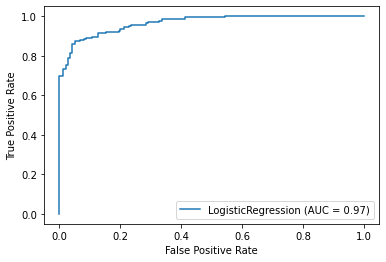

In [71]:
plot_roc_curve(log_model,scaled_x_test,y_test)